#DATA MINING AND NEURAL NETWORKS    
##Assignment 3.3 - Convolutional Neural Networks

In this file, we will implement two network architectures from scrath: (1) CNN on MNIST; (2) ResNet-18 on CIFAR-10.

Note that ResNet-18 is one type of convolutional neural network with 18 layers.
We only consider classification tasks here in the session.

All training will be conducted on a single T4 GPU.


In [ ]:
# Please first load your google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Please go to the folder with all assignment files
# Please change the following path to your own path
!cd /content/drive/MyDrive/DMNN/DMNN2023

/bin/bash: line 1: cd: /content/drive/MyDrive/DMNN/DMNN2023: No such file or directory


In [ ]:
  # Please go to Edit > Notebook settings > Hardware accelerator > choose "T4 GPU"
  # Now check if you have loaded the GPU successfully
  !nvidia-smi

Wed Dec 20 13:44:20 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Convolutional Neural Networks
In this section, we implement CNN from scrath and train it on the MNIST dataset.

We first load the dataset as follows:

In [ ]:
import torch
from torch import nn, optim, functional, utils
from torch.utils.data.dataloader import DataLoader
import torchvision
from torchvision import datasets, utils
from torchvision.datasets import MNIST

import time, os

import matplotlib.pyplot as plt
# use seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()
plt.rcParams["figure.dpi"] = 100
plt.rcParams['savefig.dpi'] = 300

def get_mnist_loader(batch_size=100, shuffle=True):
    """

    :return: train_loader, test_loader
    """
    train_dataset = MNIST(root='../data',
                          train=True,
                          transform=torchvision.transforms.ToTensor(),
                          download=True)
    test_dataset = MNIST(root='../data',
                         train=False,
                         transform=torchvision.transforms.ToTensor(),
                         download=True)

    train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                               batch_size=batch_size,
                                               shuffle=shuffle)
    test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                              batch_size=batch_size,
                                              shuffle=False)
    return train_loader, test_loader

## Build CNN from scratch
Our CNN is of 4 convolutional layers and 2 fully connected layers.
Note that you can try a different amount of layers by simply add more ``self.conv`` layers inside  ``__init__`` and ``forward`` in the following code. Please be careful with the dimension of the convolutional layers.

In [ ]:
class CNNnet(torch.nn.Module):
    def __init__(self):
        super(CNNnet,self).__init__()
        self.conv1 = torch.nn.Sequential(
            # 2-D convolution
            torch.nn.Conv2d(in_channels=1, # input channels
                            out_channels=16, # convolution channels
                            kernel_size=3, # kernel size of the convolution
                            stride=2, # stride of the kernel
                            padding=1), # padding with 0
            # Data is normalized before entering ReLU，num_features=batch_size*num_features*height*width
            # Output is with size (N,C,W,H), i.e., (batch_size, channels, width, height)
            torch.nn.BatchNorm2d(16),
            # Set activation function
            torch.nn.ReLU()
        )
        self.conv2 = torch.nn.Sequential(
            torch.nn.Conv2d(16,32,3,2,1),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU()
        )
        self.conv3 = torch.nn.Sequential(
            torch.nn.Conv2d(32,64,3,2,1),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU()
        )
        self.conv4 = torch.nn.Sequential(
            torch.nn.Conv2d(64,64,2,2,0),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU()
        )
        # set fully connected layer
        self.mlp1 = torch.nn.Linear(2*2*64,100) # y=xA^T+b
        # final output is of dimension 10 since
        # MNIST is a 10-class classification dataset
        self.mlp2 = torch.nn.Linear(100,10)

    # feedforward
    def forward(self,x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        # flatten tensor to 1-D
        x = self.mlp1(x.view(x.size(0),-1))
        x = self.mlp2(x)
        return x

## My Models

In [ ]:
class CNNnet_v1(torch.nn.Module):
    def __init__(self):
        super(CNNnet_v1,self).__init__()
        self.conv1 = torch.nn.Sequential(
            # 2-D convolution
            torch.nn.Conv2d(in_channels=1, # input channels
                            out_channels=16, # convolution channels
                            kernel_size=5, # kernel size of the convolution
                            stride=2, # stride of the kernel
                            padding=1), # padding with 0
            # Data is normalized before entering ReLU，num_features=batch_size*num_features*height*width
            # Output is with size (N,C,W,H), i.e., (batch_size, channels, width, height)
            torch.nn.BatchNorm2d(16),
            # Set activation function
            torch.nn.ReLU()
        )
        self.conv2 = torch.nn.Sequential(
            torch.nn.Conv2d(16,32,3,2,1),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU()
        )
        self.conv3 = torch.nn.Sequential(
            torch.nn.Conv2d(32,128,3,2,1),
            torch.nn.BatchNorm2d(128),
            torch.nn.ReLU()
        )
        self.conv4 = torch.nn.Sequential(
            torch.nn.Conv2d(128,64,2,2,0),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU()
        )
        # set fully connected layer
        self.mlp1 = torch.nn.Linear(2*2*64,100) # y=xA^T+b
        # final output is of dimension 10 since
        # MNIST is a 10-class classification dataset
        self.mlp2 = torch.nn.Linear(100,10)

    # feedforward
    def forward(self,x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        # flatten tensor to 1-D
        x = self.mlp1(x.view(x.size(0),-1))
        x = self.mlp2(x)
        return x

In [ ]:
class CNNnet_v2(torch.nn.Module):
    def __init__(self):
        super(CNNnet_v2, self).__init__()
        # First convolutional block
        self.conv1 = torch.nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1 = torch.nn.BatchNorm2d(32)
        self.relu1 = torch.nn.ReLU()
        self.pool1 = torch.nn.MaxPool2d(kernel_size=2, stride=2)

        # Second convolutional block with more filters
        self.conv2 = torch.nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = torch.nn.BatchNorm2d(64)
        self.relu2 = torch.nn.ReLU()

        # Third block with dilated convolution
        self.conv3 = torch.nn.Conv2d(64, 128, kernel_size=3, padding=2, dilation=2)
        self.bn3 = torch.nn.BatchNorm2d(128)
        self.relu3 = torch.nn.ReLU()

        # Global Average Pooling
        self.global_avg_pool = torch.nn.AdaptiveAvgPool2d((1, 1))

        # Fully connected layers
        self.fc1 = torch.nn.Linear(128, 64)
        self.fc2 = torch.nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool1(self.relu1(self.bn1(self.conv1(x))))
        x = self.relu2(self.bn2(self.conv2(x)))
        x = self.relu3(self.bn3(self.conv3(x)))
        x = self.global_avg_pool(x)
        x = x.view(x.size(0), -1)
        x = torch.nn.ReLU()(self.fc1(x))
        x = self.fc2(x)
        return x


In [ ]:
class CNNnet_v3(torch.nn.Module):
    def __init__(self):
        super(CNNnet_v3, self).__init__()
        # Inception-like module with different kernel sizes
        self.conv1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(32, 32, kernel_size=3, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(32, 64, kernel_size=1)
        )
        self.pool1 = torch.nn.MaxPool2d(kernel_size=2, stride=2)

        # Further increase depth
        self.conv2 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(128, 128, kernel_size=3, padding=1),
            torch.nn.ReLU()
        )
        self.pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layers
        self.fc1 = torch.nn.Linear(7*7*128, 256)
        self.relu_fc1 = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool1(self.conv1(x))
        x = self.pool2(self.conv2(x))
        x = x.view(x.size(0), -1)
        x = self.relu_fc1(self.fc1(x))
        x = self.fc2(x)
        return x


In [ ]:
class CNNnet_v4(torch.nn.Module):
    def __init__(self):
        super(CNNnet_v4, self).__init__()
        # Reduced depth with dropout
        self.conv1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.25)
        )
        self.pool1 = torch.nn.MaxPool2d(kernel_size=2, stride=2)

        # Second convolutional block with dropout
        self.conv2 = torch.nn.Sequential(
            torch.nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.25)
        )

        # Fully connected layer with dropout
        self.fc1 = torch.nn.Linear(14*14*32, 128)
        self.relu_fc1 = torch.nn.ReLU()
        self.drop_fc1 = torch.nn.Dropout(0.5)
        self.fc2 = torch.nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool1(self.conv1(x))
        x = self.conv2(x)
        x = x.view(x.size(0), -1)
        x = self.drop_fc1(self.relu_fc1(self.fc1(x)))
        x = self.fc2(x)
        return x


## Training function
The training process includes loading the model, setting the optimizer, and running on the training set for epochs.
After each training epoch, we evaluate the model on the test set to record the test accuracy.

In [ ]:
def train(myModel, train_epoch, model_save, train_loader, test_loader) :
    model = myModel
    model.cuda()

    loss_func = nn.CrossEntropyLoss( )
    # Use Adam optimizer
    optimizer = torch.optim.Adam(model.parameters( ),lr=0.001)

    acc_count = []  # record the test accuracy
    for epoch in range(train_epoch):

        model.train()

        for i, (x, y) in enumerate(train_loader):
            x = x.cuda()  # torch,Size([128,1,28,28])
            y = y.cuda()   # torch.Size([128])
            # Output of the model
            out = model(x)  # torch.Size([128,10])
            # Compute loss
            loss = loss_func(out, y)

            optimizer.zero_grad()
            loss.backward()  # backpropagation
            optimizer.step()  # update the network parameters

            # save the model checkpoint every 20 iterations
            if i % 100 == 0:
                print('{}:\t'.format(i), loss.item())
                torch.save(model, model_save)

        # evaluate the model after each training epoch
        with torch.no_grad():
            model.eval()

            true_pred = torch.zeros(1).cuda()
            nb_sample = 0

            for inputs, targets in test_loader:
                inputs = inputs.cuda()
                targets = targets.cuda()
                outputs = model(inputs)

                _, pred = torch.max(outputs, dim=1)

                true_pred = true_pred + torch.sum(pred == targets).type(torch.cuda.FloatTensor)
                nb_sample += len(inputs)

            acc = true_pred / nb_sample
            acc = acc.item()

            acc_count.append(acc)

            print('Standard ... Epoch {:d}, Acc {:.3f} %'.format(epoch, acc * 100))

    return acc_count

## Let's start training!
The network is trained for epochs 10, batch size of 100.

You can try to change the hyper-parameters to obtain better classification performance.

In [ ]:
# You can change the hyper-parameters here
train_epoch = 20
batch_size = 100
shuffle = True

# where to save the model
model_save = './MNIST_CNN/ckpt.pth'

import os
if not os.path.exists('MNIST_CNN'):
    os.mkdir('MNIST_CNN')

In [ ]:
# load datasets
train_loader, test_loader = get_mnist_loader(batch_size=batch_size, shuffle=shuffle)

100%|██████████| 9912422/9912422 [00:00<00:00, 116306757.13it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 41886477.81it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 29805508.66it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 6358654.46it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



### Train Original

In [ ]:
# train the model
acc_count0 = train(CNNnet(), train_epoch=train_epoch, model_save=model_save, train_loader=train_loader, test_loader=test_loader)


0:	 2.2980010509490967
100:	 0.3288823366165161
200:	 0.07955726981163025
300:	 0.04138985648751259
400:	 0.08531413972377777
500:	 0.16918586194515228
Standard ... Epoch 0, Acc 98.300 %
0:	 0.01487752329558134
100:	 0.011069068685173988
200:	 0.04937154799699783
300:	 0.020366905257105827
400:	 0.038669437170028687
500:	 0.0207142885774374
Standard ... Epoch 1, Acc 98.610 %
0:	 0.02755013294517994
100:	 0.09694292396306992
200:	 0.01667703688144684
300:	 0.013346373103559017
400:	 0.050707098096609116
500:	 0.003937523812055588
Standard ... Epoch 2, Acc 98.640 %
0:	 0.006365906447172165
100:	 0.010392026975750923
200:	 0.03911857679486275
300:	 0.011655645444989204
400:	 0.029762692749500275
500:	 0.02236948162317276
Standard ... Epoch 3, Acc 98.560 %
0:	 0.026917660608887672
100:	 0.006934306584298611
200:	 0.006097508128732443
300:	 0.023610549047589302
400:	 0.01518983207643032
500:	 0.043107446283102036
Standard ... Epoch 4, Acc 98.490 %
0:	 0.021746017038822174
100:	 0.0370183140

### Train mine 1

In [ ]:
# Simple test. Much the same but with I go op to 32x128 -> 128x64 at one point
acc_count1 = train(CNNnet_v1(), train_epoch=train_epoch, model_save='./MNIST_CNN/myNet_v1.pth', train_loader=train_loader, test_loader=test_loader)

0:	 2.3334131240844727
100:	 0.10522034764289856
200:	 0.11630628257989883
300:	 0.05236150324344635
400:	 0.0847146138548851
500:	 0.04360540956258774
Standard ... Epoch 0, Acc 98.280 %
0:	 0.0522347167134285
100:	 0.02262018248438835
200:	 0.046561188995838165
300:	 0.02131824940443039
400:	 0.06531807035207748
500:	 0.0805283933877945
Standard ... Epoch 1, Acc 98.630 %
0:	 0.10214293748140335
100:	 0.08099439740180969
200:	 0.010371408425271511
300:	 0.013417068868875504
400:	 0.019622039049863815
500:	 0.013566982932388783
Standard ... Epoch 2, Acc 98.510 %
0:	 0.016755975782871246
100:	 0.005890526808798313
200:	 0.007016043644398451
300:	 0.006613711826503277
400:	 0.004781734198331833
500:	 0.012056154198944569
Standard ... Epoch 3, Acc 98.920 %
0:	 0.010893773287534714
100:	 0.019020112231373787
200:	 0.011727984994649887
300:	 0.0037500238977372646
400:	 0.012061739340424538
500:	 0.03158681094646454
Standard ... Epoch 4, Acc 99.060 %
0:	 0.007595585659146309
100:	 0.000848893

### Train Mine 2

In [ ]:
# New new model
acc_count2 = train(CNNnet_v2(), train_epoch=train_epoch, model_save='./MNIST_CNN/myNet_v2.pth', train_loader=train_loader, test_loader=test_loader)

0:	 2.3259880542755127
100:	 0.659330427646637
200:	 0.1591784954071045
300:	 0.12873992323875427
400:	 0.1698615700006485
500:	 0.1112782210111618
Standard ... Epoch 0, Acc 86.310 %
0:	 0.06641543656587601
100:	 0.08213821053504944
200:	 0.09934709221124649
300:	 0.09823155403137207
400:	 0.045125823467969894
500:	 0.08902225643396378
Standard ... Epoch 1, Acc 92.370 %
0:	 0.06277439743280411
100:	 0.10889437794685364
200:	 0.049869880080223083
300:	 0.045689601451158524
400:	 0.026733143255114555
500:	 0.11182389408349991
Standard ... Epoch 2, Acc 96.060 %
0:	 0.027821876108646393
100:	 0.03973442688584328
200:	 0.21461032330989838
300:	 0.01889222487807274
400:	 0.023828603327274323
500:	 0.039460714906454086
Standard ... Epoch 3, Acc 98.070 %
0:	 0.049556560814380646
100:	 0.017328772693872452
200:	 0.020425595343112946
300:	 0.010137942619621754
400:	 0.0362849086523056
500:	 0.019497843459248543
Standard ... Epoch 4, Acc 97.630 %
0:	 0.010080636478960514
100:	 0.02071621268987655

## Training mine 3

In [ ]:
# New new model
acc_count3 = train(CNNnet_v3(), train_epoch=train_epoch, model_save='./MNIST_CNN/myNet_v3.pth', train_loader=train_loader, test_loader=test_loader)

0:	 2.299278497695923
100:	 0.1633206307888031
200:	 0.19520199298858643
300:	 0.07844112068414688
400:	 0.08166906982660294
500:	 0.041521161794662476
Standard ... Epoch 0, Acc 98.560 %
0:	 0.07528463751077652
100:	 0.004626294132322073
200:	 0.08884355425834656
300:	 0.008238223381340504
400:	 0.04578441008925438
500:	 0.03325756639242172
Standard ... Epoch 1, Acc 99.120 %
0:	 0.01670207269489765
100:	 0.048500314354896545
200:	 0.00708779925480485
300:	 0.011418820358812809
400:	 0.010155408643186092
500:	 0.010571777820587158
Standard ... Epoch 2, Acc 99.040 %
0:	 0.009656795300543308
100:	 0.014575843699276447
200:	 0.01267700269818306
300:	 0.01809706725180149
400:	 0.00812520645558834
500:	 0.008841030299663544
Standard ... Epoch 3, Acc 99.240 %
0:	 0.0015680507058277726
100:	 0.002321651903912425
200:	 0.00528500834479928
300:	 0.0030909881461411715
400:	 0.001138979336246848
500:	 0.001583625329658389
Standard ... Epoch 4, Acc 99.150 %
0:	 0.0027439272962510586
100:	 0.0027523

In [ ]:
# New new model
acc_count4 = train(CNNnet_v4(), train_epoch=train_epoch, model_save='./MNIST_CNN/myNet_v4.pth', train_loader=train_loader, test_loader=test_loader)

0:	 2.3060245513916016
100:	 0.3753580152988434
200:	 0.2621205449104309
300:	 0.392872154712677
400:	 0.0773724615573883
500:	 0.21130065619945526
Standard ... Epoch 0, Acc 97.390 %
0:	 0.2229701578617096
100:	 0.06912439316511154
200:	 0.11255215853452682
300:	 0.056271910667419434
400:	 0.0485268197953701
500:	 0.07463323324918747
Standard ... Epoch 1, Acc 98.410 %
0:	 0.06873326748609543
100:	 0.08915860205888748
200:	 0.15534423291683197
300:	 0.06579006463289261
400:	 0.05574987828731537
500:	 0.06594434380531311
Standard ... Epoch 2, Acc 98.570 %
0:	 0.09245147556066513
100:	 0.11387710273265839
200:	 0.019174186512827873
300:	 0.11927971243858337
400:	 0.011027741245925426
500:	 0.03440222144126892
Standard ... Epoch 3, Acc 98.590 %
0:	 0.08954545855522156
100:	 0.046767015010118484
200:	 0.136648029088974
300:	 0.09757404029369354
400:	 0.04670320823788643
500:	 0.11283962428569794
Standard ... Epoch 4, Acc 98.760 %
0:	 0.07968292385339737
100:	 0.0394006110727787
200:	 0.0639

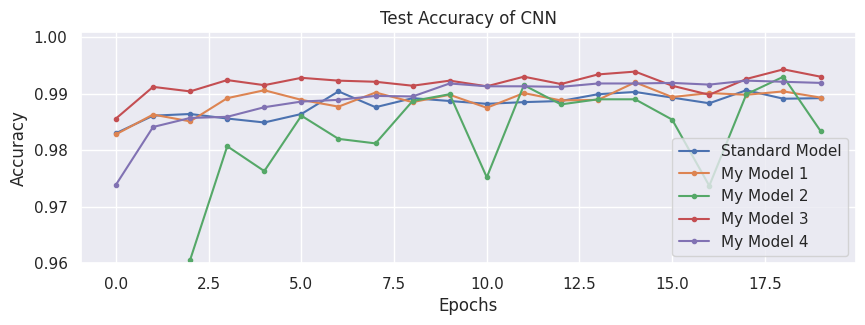

In [ ]:
# Plot the accuracy curves w.r.t. epochs

plt.figure(figsize=(10, 3))

plt.plot(acc_count0, marker='.', label='Standard Model')
plt.plot(acc_count1, marker='.', label='My Model 1')
plt.plot(acc_count2, marker='.', label='My Model 2')
plt.plot(acc_count3, marker='.', label='My Model 3')
plt.plot(acc_count4, marker='.', label='My Model 4')

plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Test Accuracy of CNN')

# plt.yscale('log')
plt.ylim(bottom=0.96)


plt.legend()
plt.show()

# Residual neural network
In this section, we build ResNet-18, which is one type of convolutional neural network, from scratch and evaluate its performance on the CIFAR-10 test set with the given checkpoint.

CIFAR-10 is a dataset consisting of 60000 32x32 colour images in 10 classes, with 6000 images per class. Please check [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) for details.

Now we first write the function for loading the dataset.

In [ ]:
import torch
from torch import nn, optim, functional, utils
from torch.utils.data.dataloader import DataLoader
import torchvision
from torchvision import datasets, utils
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms

import time, os

def get_cifar10_loader(batch_size=100, shuffle=True):
    """
    :return: train_loader, test_loader
    """
    norm_mean, norm_std = (0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)

    # transformation of the training set
    transform_train = transforms.Compose([
            transforms.RandomCrop(32, padding=4),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize(norm_mean, norm_std)])

    # transformation of the validation set
    transform_val = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(norm_mean, norm_std)])

    train_dataset = CIFAR10(root='../data',
                          train=True,
                          transform=transform_train,
                          download=True)

    test_dataset = CIFAR10(root='../data',
                         train=False,
                         transform=transform_val,
                         download=True)

    train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                               batch_size=batch_size,
                                               shuffle=shuffle)
    test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                              batch_size=batch_size,
                                              shuffle=shuffle)
    return train_loader, test_loader

## Build ResNet-18 from scratch
The implementation of ResNet-18 is more complicated than the CNN mentioned in previous section. You can directly run this cell even if you do not understand the programming for now.

In [ ]:
import torch
import torch.nn as nn

def conv3x3(in_planes, out_planes, stride=1, groups=1, dilation=1):
    """3x3 convolution with padding"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=dilation, groups=groups, bias=False, dilation=dilation)


def conv1x1(in_planes, out_planes, stride=1):
    """1x1 convolution"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride, bias=False)


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None, groups=1,
                 base_width=64, dilation=1, norm_layer=None):
        super(BasicBlock, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        if groups != 1 or base_width != 64:
            raise ValueError('BasicBlock only supports groups=1 and base_width=64')
        if dilation > 1:
            raise NotImplementedError("Dilation > 1 not supported in BasicBlock")
        # Both self.conv1 and self.downsample layers downsample the input when stride != 1
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = norm_layer(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = norm_layer(planes)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


class Bottleneck(nn.Module):
    # Bottleneck in torchvision places the stride for downsampling at 3x3 convolution(self.conv2)
    # while original implementation places the stride at the first 1x1 convolution(self.conv1)
    # according to "Deep residual learning for image recognition"https://arxiv.org/abs/1512.03385.
    # This variant is also known as ResNet V1.5 and improves accuracy according to
    # https://ngc.nvidia.com/catalog/model-scripts/nvidia:resnet_50_v1_5_for_pytorch.

    expansion = 4

    def __init__(self, inplanes, planes, stride=1, downsample=None, groups=1,
                 base_width=64, dilation=1, norm_layer=None):
        super(Bottleneck, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        width = int(planes * (base_width / 64.)) * groups
        # Both self.conv2 and self.downsample layers downsample the input when stride != 1
        self.conv1 = conv1x1(inplanes, width)
        self.bn1 = norm_layer(width)
        self.conv2 = conv3x3(width, width, stride, groups, dilation)
        self.bn2 = norm_layer(width)
        self.conv3 = conv1x1(width, planes * self.expansion)
        self.bn3 = norm_layer(planes * self.expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


class ResNet(nn.Module):

    def __init__(self, block, layers, num_classes=1000, zero_init_residual=False,
                 groups=1, width_per_group=64, replace_stride_with_dilation=None,
                 norm_layer=None):
        super(ResNet, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        self._norm_layer = norm_layer

        self.inplanes = 64
        self.dilation = 1
        if replace_stride_with_dilation is None:
            # each element in the tuple indicates if we should replace
            # the 2x2 stride with a dilated convolution instead
            replace_stride_with_dilation = [False, False, False]
        if len(replace_stride_with_dilation) != 3:
            raise ValueError("replace_stride_with_dilation should be None "
                             "or a 3-element tuple, got {}".format(replace_stride_with_dilation))
        self.groups = groups
        self.base_width = width_per_group
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = norm_layer(self.inplanes)
        self.relu = nn.ReLU(inplace=True)
        #self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2,
                                       dilate=replace_stride_with_dilation[0])
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2,
                                       dilate=replace_stride_with_dilation[1])
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2,
                                       dilate=replace_stride_with_dilation[2])
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, (nn.BatchNorm2d, nn.GroupNorm)):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

        # Zero-initialize the last BN in each residual branch,
        # so that the residual branch starts with zeros, and each residual block behaves like an identity.
        # This improves the model by 0.2~0.3% according to https://arxiv.org/abs/1706.02677
        if zero_init_residual:
            for m in self.modules():
                if isinstance(m, Bottleneck):
                    nn.init.constant_(m.bn3.weight, 0)
                elif isinstance(m, BasicBlock):
                    nn.init.constant_(m.bn2.weight, 0)

    def _make_layer(self, block, planes, blocks, stride=1, dilate=False):
        norm_layer = self._norm_layer
        downsample = None
        previous_dilation = self.dilation
        if dilate:
            self.dilation *= stride
            stride = 1
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                conv1x1(self.inplanes, planes * block.expansion, stride),
                norm_layer(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample, self.groups,
                            self.base_width, previous_dilation, norm_layer))
        self.inplanes = planes * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.inplanes, planes, groups=self.groups,
                                base_width=self.base_width, dilation=self.dilation,
                                norm_layer=norm_layer))

        return nn.Sequential(*layers)

    def _forward_impl(self, x):
        # See note [TorchScript super()]
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        #x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

    def forward(self, x):
        return self._forward_impl(x)


def _resnet(block, layers, **kwargs):
    model = ResNet(block, layers, **kwargs)
    return model


def ResNet18(**kwargs):
    return _resnet(BasicBlock, [2, 2, 2, 2],**kwargs)

## Let's test on CIFAR-10
We first give the test function that will record the test accuracy on the CIFAR-10 test set.
Then we will load the give checkpoints to our model and start evaluating.

Please download the [checkpoint](https://drive.google.com/file/d/1K9wYV7s7OoOgvg284-D_-47K968IGNWM/view?usp=sharing) of ResNet-18 trained on CIFAR-10 training set from google drive and put it into your own working directory on your own drive.

In [ ]:
def Test(net, test_loader):

    net.eval()

    true_pred = torch.zeros(1).cuda()
    nb_sample = 0

    for batchIdx, (inputs, targets) in enumerate(test_loader):
        inputs = inputs.cuda()
        targets = targets.cuda()

        outputs = net(inputs)

        _, pred = torch.max(outputs, dim=1)

        true_pred = true_pred + torch.sum(pred == targets).type(torch.cuda.FloatTensor)
        nb_sample += len(inputs)

    acc = true_pred / nb_sample
    acc = acc.item()

    msg = 'Test Acc {:.3f} %'.format(acc * 100)
    print (msg)

    return acc

In [ ]:
# Please change the checkpoint path to your own
# resumePth = "/content/drive/MyDrive/DMNN/DMNN2023/cifar10_resnet18_Acc0.952/resnet18_cifar10_baseline.pt"
# resumePth = "/content/drive/MyDrive/KU_Leuven/DMNN/cifar10_resnet18_Acc0.952/resnet18_cifar10_baseline.pt"
resumePth = "/content/drive/MyDrive/KU_Leuven/DMNN/cifar10_resnet18_Acc0.952/resnet18_cifar10_baseline.pt"
_, test_loader = get_cifar10_loader(batch_size=100, shuffle=True)

model = ResNet18(num_classes=10)
model.cuda()

# Load the trained model checkpoint
if resumePth:
    param = torch.load(resumePth)
    model.load_state_dict(param)
    print ('\t---Loading net weights from {}'.format(resumePth))

Files already downloaded and verified
Files already downloaded and verified
	---Loading net weights from /content/drive/MyDrive/KU_Leuven/DMNN/cifar10_resnet18_Acc0.952/resnet18_cifar10_baseline.pt


In [ ]:
# Test accuracy of the model on the CIFAR-10 test set

test_acc = Test(model, test_loader)

Test Acc 95.240 %


## Visualize the results
Now we visualize some of our test data and check if the prediction results given by our ResNet-18 are correct or not.

In [ ]:
def unnomalized(img):
    mean, std = (0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)
    for i in range(img.size(0)):
        img[i] = img[i]*std[i] + mean[i]
    img = img.numpy().transpose(1,2,0)
    return img

In [ ]:
# Choose one batch from the test_loader
dataiter = iter(test_loader)
images_batch, labels_batch = next(dataiter)

# Choose 10 images from the batch
images = images_batch[:10]
labels = labels_batch[:10]
outputs = model(images.cuda())
_, pred = torch.max(outputs, dim=1)



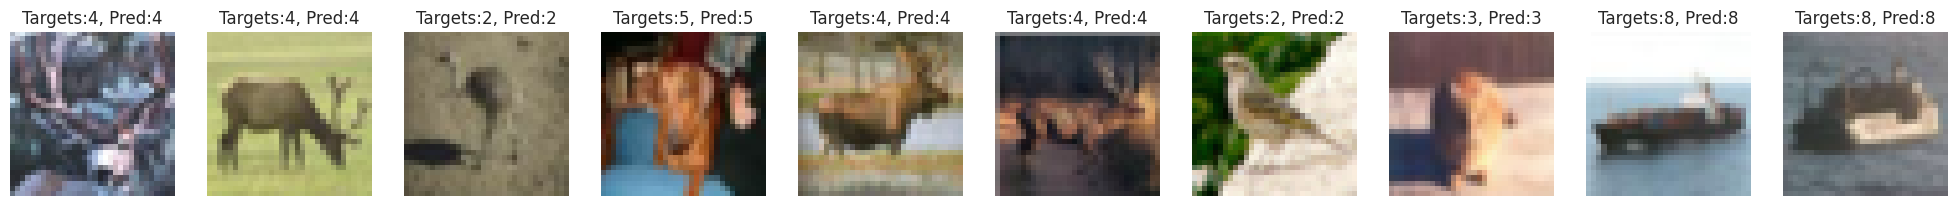

In [ ]:
import matplotlib.pyplot as plt

# Plot 10 images from the test batch
fig, axes = plt.subplots(nrows=1, ncols=10, sharex=True, sharey=True, figsize=(25,8))


for i in range(images.size(0)):
    axes[i].imshow(unnomalized(images[i]), interpolation='nearest')
    axes[i].axis('off')
    axes[i].title.set_text("Targets:{:d}, Pred:{:d}".format(labels[i],pred[i]))

In [ ]:
wrong_pred = []
num_images = 0

for images_batch, labels_batch in test_loader:
    if num_images >= 10000:
        break

    # Forward pass
    outputs = model(images_batch.cuda())
    _, pred = torch.max(outputs, dim=1)

    # Identifying misclassified images
    wrong_pred.extend([(img.cpu(), label, p) for img, label, p in zip(images_batch, labels_batch, pred) if label != p])

    # Update the count of images processed
    num_images += len(images_batch)

# Print details of wrong predictions
for i, (img, label, p) in enumerate(wrong_pred):
    print(f"Image {i}: True Label: {label}, Predicted: {p}")

Image 0: True Label: 3, Predicted: 5
Image 1: True Label: 1, Predicted: 9
Image 2: True Label: 5, Predicted: 3
Image 3: True Label: 5, Predicted: 3
Image 4: True Label: 3, Predicted: 7
Image 5: True Label: 3, Predicted: 2
Image 6: True Label: 5, Predicted: 7
Image 7: True Label: 1, Predicted: 0
Image 8: True Label: 4, Predicted: 2
Image 9: True Label: 3, Predicted: 4
Image 10: True Label: 6, Predicted: 3
Image 11: True Label: 0, Predicted: 4
Image 12: True Label: 5, Predicted: 3
Image 13: True Label: 4, Predicted: 7
Image 14: True Label: 5, Predicted: 3
Image 15: True Label: 0, Predicted: 8
Image 16: True Label: 5, Predicted: 2
Image 17: True Label: 3, Predicted: 7
Image 18: True Label: 2, Predicted: 8
Image 19: True Label: 8, Predicted: 3
Image 20: True Label: 2, Predicted: 3
Image 21: True Label: 2, Predicted: 6
Image 22: True Label: 0, Predicted: 8
Image 23: True Label: 2, Predicted: 5
Image 24: True Label: 8, Predicted: 0
Image 25: True Label: 7, Predicted: 4
Image 26: True Label: 

In [ ]:
wrong_pred_count = {}

# Iterate over the wrong predictions and update the count for each label
for _, label, _ in wrong_pred:
    if label.item() in wrong_pred_count:
        wrong_pred_count[label.item()] += 1
    else:
        wrong_pred_count[label.item()] = 1

# Print the count of wrong predictions for each label
for label in sorted(wrong_pred_count):
    print(f"Label: {label}, Wrong predictions: {wrong_pred_count[label]}")

Label: 0, Wrong predictions: 48
Label: 1, Wrong predictions: 15
Label: 2, Wrong predictions: 62
Label: 3, Wrong predictions: 100
Label: 4, Wrong predictions: 38
Label: 5, Wrong predictions: 94
Label: 6, Wrong predictions: 25
Label: 7, Wrong predictions: 21
Label: 8, Wrong predictions: 35
Label: 9, Wrong predictions: 38


In [ ]:
# Filter for cases where the true label is 3 but the model predicted differently
wrong_predictions_for_label_3 = [(img, p) for img, label, p in wrong_pred if label.item() == 5 and label.item() != p.item()]

# Print the predictions for these cases
print(f"Wrong predictions for label 3:")
for i, (_, predicted_label) in enumerate(wrong_predictions_for_label_3):
    print(f"Instance {i}: Predicted Label: {predicted_label.item()}")


Wrong predictions for label 3:
Instance 0: Predicted Label: 3
Instance 1: Predicted Label: 3
Instance 2: Predicted Label: 7
Instance 3: Predicted Label: 3
Instance 4: Predicted Label: 3
Instance 5: Predicted Label: 2
Instance 6: Predicted Label: 3
Instance 7: Predicted Label: 3
Instance 8: Predicted Label: 3
Instance 9: Predicted Label: 3
Instance 10: Predicted Label: 3
Instance 11: Predicted Label: 7
Instance 12: Predicted Label: 3
Instance 13: Predicted Label: 3
Instance 14: Predicted Label: 3
Instance 15: Predicted Label: 4
Instance 16: Predicted Label: 3
Instance 17: Predicted Label: 3
Instance 18: Predicted Label: 3
Instance 19: Predicted Label: 7
Instance 20: Predicted Label: 0
Instance 21: Predicted Label: 4
Instance 22: Predicted Label: 4
Instance 23: Predicted Label: 3
Instance 24: Predicted Label: 3
Instance 25: Predicted Label: 3
Instance 26: Predicted Label: 3
Instance 27: Predicted Label: 3
Instance 28: Predicted Label: 4
Instance 29: Predicted Label: 2
Instance 30: Predic